# House price prediction


# Getting dataset from kaggle


In [274]:
import kaggle
import pandas as pd
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [275]:
import os
from zipfile import ZipFile
file = os.listdir()
if "data" in file:
    for i in file:
        if i.endswith(".zip"):
            file_path = os.getcwd()+"/"+i
            ZipFile(file_path).extractall(os.getcwd()+"/data")
else:
    for i in file:
        if i.endswith(".zip"):
            os.makedirs(os.getcwd()+"/data")
            file_path = os.getcwd()+"/"+i
            ZipFile(file_path).extractall(os.getcwd()+"/data")




PermissionError: [Errno 13] Permission denied: 'D:\\my work\\kaggle\\house price prediction regression\\data\\test.csv'

In [317]:
import pandas as pd
def get_dataset():
    train_dataset = pd.read_csv(os.getcwd()+"//data/train.csv")
    test_dataset = pd.read_csv(os.getcwd()+"//data/test.csv")
    return train_dataset, test_dataset

train_data, test_data = get_dataset()


In [277]:
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [278]:
train_data.shape


(1460, 81)

In [279]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [280]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [281]:
train_data.drop("Id", axis=1, inplace=True)

# getting the null value

In [282]:
num_value = [x for x in train_data if train_data[x].dtype !='O' and x != "SalePrice"]
num_value

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [283]:
cat_value = [x for x in train_data if train_data[x].dtype == 'O']
cat_value

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [284]:
train_data.isnull().sum()


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [285]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="mean")
train_data[num_value] = si.fit_transform(train_data[num_value])

In [286]:
train_data[num_value].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [287]:
si_cat = SimpleImputer(strategy="most_frequent")
train_data[cat_value] = si_cat.fit_transform(train_data[cat_value])
train_data[cat_value].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [288]:
train_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2008.0,WD,Normal,208500
1,20.0,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0.0,Gd,MnPrv,Shed,0.0,5.0,2007.0,WD,Normal,181500
2,60.0,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0.0,Gd,MnPrv,Shed,0.0,9.0,2008.0,WD,Normal,223500
3,70.0,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2006.0,WD,Abnorml,140000
4,60.0,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0.0,Gd,MnPrv,Shed,0.0,12.0,2008.0,WD,Normal,250000


In [289]:
train_data[cat_value].value_counts()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  SaleType  SaleCondition
RM        Pave    Grvl   Reg       Lvl          AllPub     Inside     Gtl        CollgCr       Norm        Norm        TwnhsE    1Story      Gable      CompShg   VinylSd      VinylSd      BrkFace     Gd         TA         PConc       Gd        TA        Av            GLQ           Unf           GasA     Ex         Y           SBrkr       Gd           Typ         Gd           Attchd      Fin           TA          TA          Y           Gd      MnPrv  Shed         WD        Normal           4
RL        P

<Figure size 1440x1440 with 0 Axes>

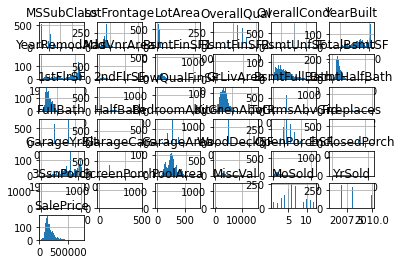

In [290]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
train_data.hist(bins=50)
plt.show()

In [291]:
#correlation for numerical data
corr_matrix = train_data.corr()
for i in num_value:
    print(corr_matrix[i].sort_values(ascending=False))

MSSubClass       1.000000
2ndFlrSF         0.307886
KitchenAbvGr     0.281721
HalfBath         0.177354
FullBath         0.131608
GarageYrBlt      0.080187
GrLivArea        0.074853
LowQualFinSF     0.046474
YearRemodAdd     0.040581
TotRmsAbvGrd     0.040380
OverallQual      0.032628
YearBuilt        0.027850
MasVnrArea       0.022895
PoolArea         0.008283
BsmtFullBath     0.003491
BsmtHalfBath    -0.002333
OpenPorchSF     -0.006100
MiscVal         -0.007683
EnclosedPorch   -0.012037
WoodDeckSF      -0.012579
MoSold          -0.013585
YrSold          -0.021407
BedroomAbvGr    -0.023438
ScreenPorch     -0.026030
GarageCars      -0.040110
3SsnPorch       -0.043825
Fireplaces      -0.045569
OverallCond     -0.059316
BsmtFinSF2      -0.065649
BsmtFinSF1      -0.069836
SalePrice       -0.084284
GarageArea      -0.098672
LotArea         -0.139781
BsmtUnfSF       -0.140759
TotalBsmtSF     -0.238518
1stFlrSF        -0.251758
LotFrontage     -0.357056
Name: MSSubClass, dtype: float64
LotFr

In [292]:
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


array([[<AxesSubplot:xlabel='MSSubClass', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='LotFrontage', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='LotArea', ylabel='MSSubClass'>, ...,
        <AxesSubplot:xlabel='MiscVal', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='MoSold', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='YrSold', ylabel='MSSubClass'>],
       [<AxesSubplot:xlabel='MSSubClass', ylabel='LotFrontage'>,
        <AxesSubplot:xlabel='LotFrontage', ylabel='LotFrontage'>,
        <AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>, ...,
        <AxesSubplot:xlabel='MiscVal', ylabel='LotFrontage'>,
        <AxesSubplot:xlabel='MoSold', ylabel='LotFrontage'>,
        <AxesSubplot:xlabel='YrSold', ylabel='LotFrontage'>],
       [<AxesSubplot:xlabel='MSSubClass', ylabel='LotArea'>,
        <AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>,
        <AxesSubplot:xlabel='LotArea', ylabel='LotArea'>, ...,
        <AxesSubplot:xlabel='MiscVal', ylabel='LotArea

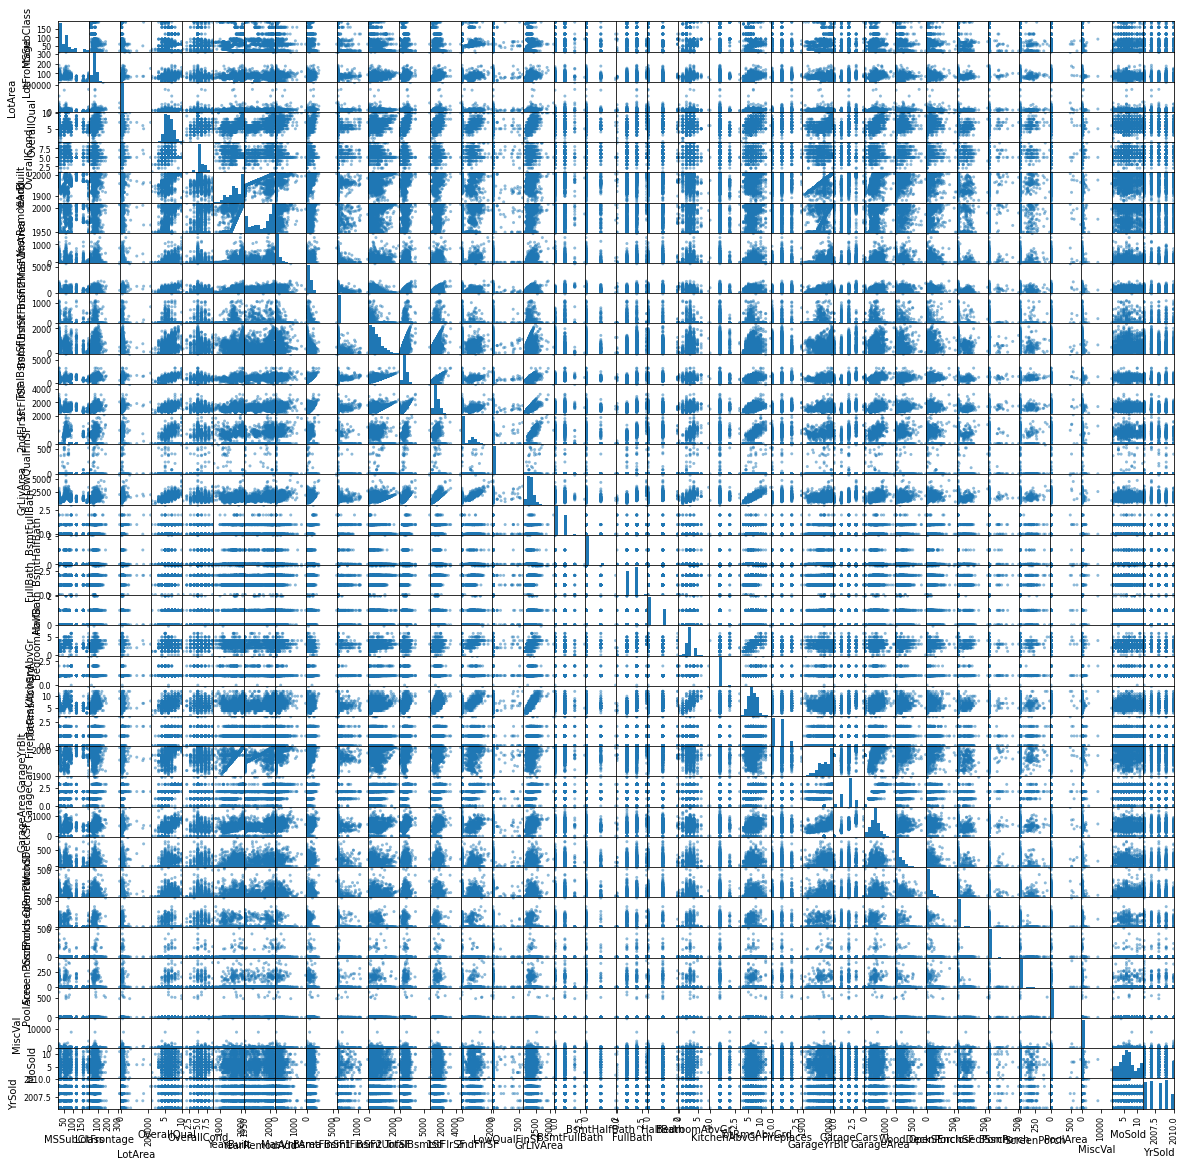

In [293]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_data[num_value], figsize=(20,20))


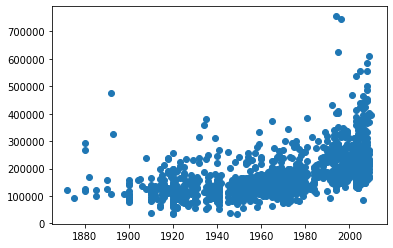

In [294]:
plt.scatter(train_data["YearBuilt"], train_data["SalePrice"])

In [295]:
corr_matrix["YearBuilt"]


MSSubClass       0.027850
LotFrontage      0.117598
LotArea          0.014228
OverallQual      0.572323
OverallCond     -0.375983
YearBuilt        1.000000
YearRemodAdd     0.592855
MasVnrArea       0.314745
BsmtFinSF1       0.249503
BsmtFinSF2      -0.049107
BsmtUnfSF        0.149040
TotalBsmtSF      0.391452
1stFlrSF         0.281986
2ndFlrSF         0.010308
LowQualFinSF    -0.183784
GrLivArea        0.199010
BsmtFullBath     0.187599
BsmtHalfBath    -0.038162
FullBath         0.468271
HalfBath         0.242656
BedroomAbvGr    -0.070651
KitchenAbvGr    -0.174800
TotRmsAbvGrd     0.095589
Fireplaces       0.147716
GarageYrBlt      0.780555
GarageCars       0.537850
GarageArea       0.478954
WoodDeckSF       0.224880
OpenPorchSF      0.188686
EnclosedPorch   -0.387268
3SsnPorch        0.031355
ScreenPorch     -0.050364
PoolArea         0.004950
MiscVal         -0.034383
MoSold           0.012398
YrSold          -0.013618
SalePrice        0.522897
Name: YearBuilt, dtype: float64

In [296]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
train_data_cat = cat_encoder.fit_transform(train_data[cat_value])


In [297]:
cat_encoder.categories_


[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 

In [325]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("std_scaler", StandardScaler()),
])
train_num_pipeline = num_pipeline.fit_transform(train_data[num_value])
test_num_pipeline = num_pipeline.transform(test_data[num_value])
test_num_pipeline

array([[-8.72562756e-01,  4.51936101e-01,  1.10762574e-01, ...,
        -8.76878115e-02, -1.19109702e-01,  1.64520971e+00],
       [-8.72562756e-01,  4.97356624e-01,  3.75849846e-01, ...,
         2.51163088e+01, -1.19109702e-01,  1.64520971e+00],
       [ 7.33749635e-02,  1.79412959e-01,  3.32052818e-01, ...,
        -8.76878115e-02, -1.22911075e+00,  1.64520971e+00],
       ...,
       [-8.72562756e-01,  4.08557799e+00,  9.50422748e-01, ...,
        -8.76878115e-02,  9.90891347e-01, -1.36765473e+00],
       [ 6.64586038e-01, -3.65633324e-01, -7.59964439e-03, ...,
         1.32373600e+00,  2.50890648e-01, -1.36765473e+00],
       [ 7.33749635e-02,  1.79412959e-01, -8.91803775e-02, ...,
        -8.76878115e-02,  1.73089205e+00, -1.36765473e+00]])

In [299]:
cat_pipeline = Pipeline([
    ("imputer_cat", SimpleImputer(strategy="most_frequent")),
    ("encoding", OneHotEncoder())
])
train_cat_pipeline = cat_pipeline.fit_transform(train_data[cat_value])

In [300]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_value),
    ("cat", cat_pipeline, cat_value),
])
train_data_prepared = full_pipeline.fit_transform(train_data)

In [301]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_data_prepared, train_data["SalePrice"])


LinearRegression()

In [302]:
y_lin_pred = lin_reg.predict(train_data_prepared)
y_lin_pred

array([208212.85140808, 206534.63938371, 206284.03267614, ...,
       274752.39294627, 143220.9208692 , 150553.41761202])

In [303]:
train_data["SalePrice"]


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [304]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, train_data_prepared, train_data["SalePrice"], scoring="neg_mean_squared_error" ,cv=10)
lin_rmse = np.sqrt(-scores)

In [305]:
scores


array([-5.82093037e+08, -1.24296826e+09, -5.43549743e+08, -1.73547405e+09,
       -9.30741313e+08, -1.89561937e+09, -5.87091209e+08, -5.13108627e+08,
       -4.46003310e+09, -4.77518996e+08])

In [306]:
lin_rmse


array([24126.60434356, 35255.75501431, 23314.15327544, 41659.02125242,
       30508.05324014, 43538.71118501, 24229.96511248, 22651.90118325,
       66783.47921649, 21852.208038  ])

In [307]:
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor()
for_reg.fit(train_data_prepared, train_data["SalePrice"])



RandomForestRegressor()

In [308]:
forest_scores = cross_val_score(for_reg, train_data_prepared, train_data["SalePrice"], scoring="neg_mean_squared_error" ,cv=10)
forest_rmse = np.sqrt(-forest_scores)

In [309]:
forest_rmse
# As we can see the rmse score is much better than the linear regression
# so we can use random forest as our final model

array([25079.57629331, 26499.38490437, 22048.59457192, 40652.61481266,
       33546.26969776, 25987.52638705, 24858.40949567, 24190.11528219,
       42952.44761635, 27236.06921806])

# using the test data

In [318]:
test_data.head()
test_data.drop("Id", axis=1, inplace=True)
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [319]:
test_data_prepared = full_pipeline.transform(test_data)

In [320]:
val_set = pd.read_csv(os.getcwd()+"\data"+"/sample_submission.csv")
val_set.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [328]:
test_data[num_value] = si.fit_transform(test_data[num_value])
test_data[cat_value] = si_cat.fit_transform(test_data[cat_value])
test_cat_encoding = OneHotEncoder()
test_data = test_cat_encoding.fit_transform(test_data[cat_value])
full_pipeline.transform(test_data)

from sklearn.metrics import mean_squared_error
train_error, val_error = [], []
y_train_pred = for_reg.predict(train_data_prepared)
y_test_pred = for_reg.predict(test_data_prepared)
train_error.append(mean_squared_error(train_data["SalePrice"], y_train_pred))
val_error.append(mean_squared_error(val_set["SalePrice"], y_test_pred))
plt.plot(np.sqrt(train_error), "r-", label="train")
plt.plot(np.sqrt(val_error), "g-", label="val")
plt.legend(loc="upper right")
plt.show()

TypeError: cannot perform reduce with flexible type

In [ ]:
y_test_pred = for_reg.predict(test_data_prepared)


In [323]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
train_data